## Using hardcoded perceptron functions

### Importing library

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Importing the dataset

In [81]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.drop("id", axis=1, inplace=True)
data["Stroke"] = np.where(data.iloc[:, -1]=='Yes', 1, 0)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,2,61.0,0,0,1,5,2,202.21,30.0,2,1
2,1,80.0,0,1,1,1,2,105.92,32.5,2,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3,1
4,2,79.0,1,0,1,5,2,174.12,24.0,2,1


No handles with labels found to put in legend.


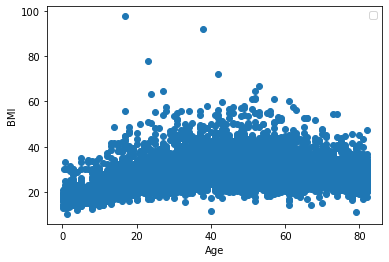

In [82]:
plt.scatter(data["age"], data["bmi"], marker='o')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

### Building the functions for perceptron

In [83]:
def perceptron(data, num_iter):
    misclassified_ = [] 
    features = data[:, :-1]
    labels = data[:, -1]
    w = np.zeros(shape=(1, features.shape[1]+1))
    predicted = []
  
    for epoch in range(num_iter):
        misclassified = 0
        predicted_epoch = []
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            if (y > 0):
                target = 1.0 
            else:
                target = 0.0
            
            delta = (label.item(0,0) - target)
            predicted_epoch.append(target)
            if(delta):
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
        predicted.append(predicted_epoch)
    return (w, misclassified_, predicted)

### Calculating the perceptron

In [84]:
data = np.asmatrix(data, dtype = 'float64')
max_iterations = 10 
w, misclassified_, prediction = perceptron(data, max_iterations)

### Visualise the performance
#### The graph is zigzag since the model is misclassified in certain epochs

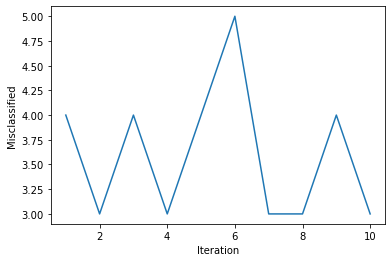

In [85]:
epochs = np.arange(1, max_iterations+1)
plt.plot(epochs, misclassified_)
plt.xlabel('Iteration')
plt.ylabel('Misclassified')
plt.show()

### Calculating coefficients of each column

In [86]:
print("The weights are :")
for i in range(len(w[0])):
    print("Coefficient " + str(i) + " = " + str(w[0][i]))

The weights are :
Coefficient 0 = -14.0
Coefficient 1 = -17.0
Coefficient 2 = 28.0
Coefficient 3 = -10.0
Coefficient 4 = 10.0
Coefficient 5 = 0.0
Coefficient 6 = -20.0
Coefficient 7 = -23.0
Coefficient 8 = -13.230000000000004
Coefficient 9 = -260.6
Coefficient 10 = -68.0


### Calculating the prediction

In [87]:
expected_d = data[:, -1]
expected = []
for i in range(len(expected_d)):
    expected.append(int(expected_d[i]))

### Function for confusion matrix

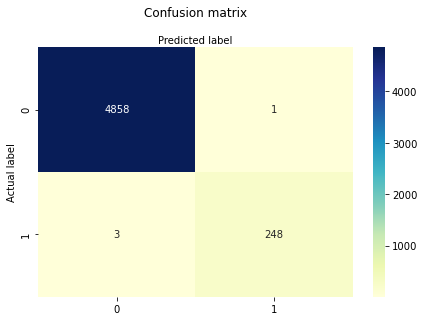

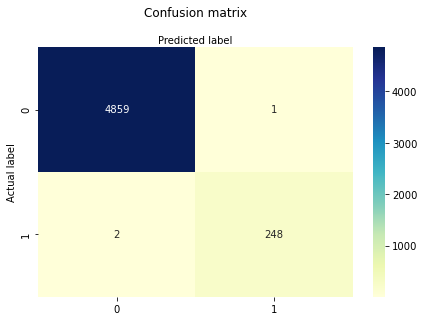

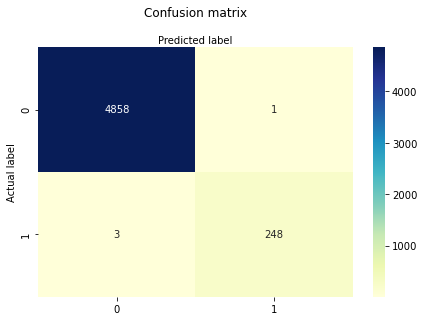

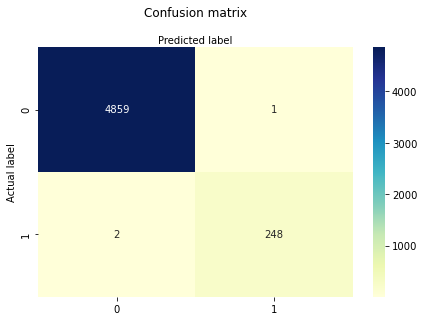

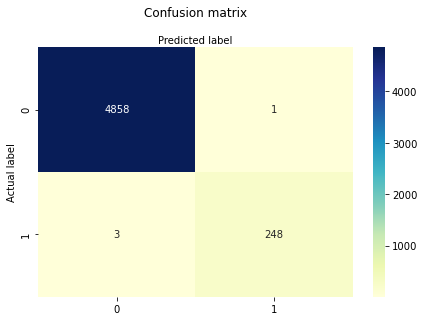

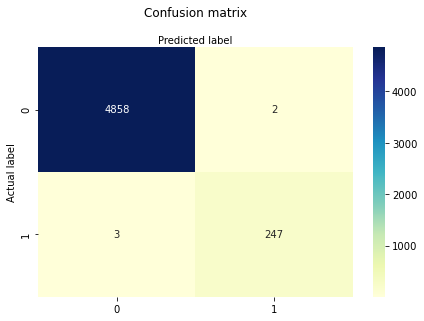

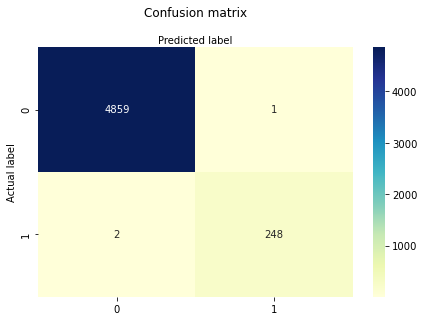

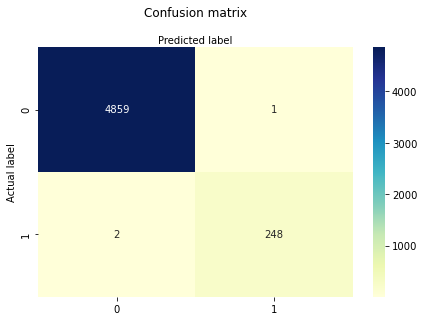

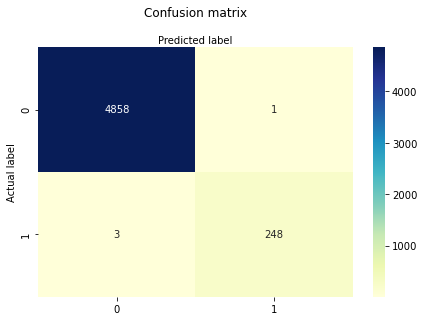

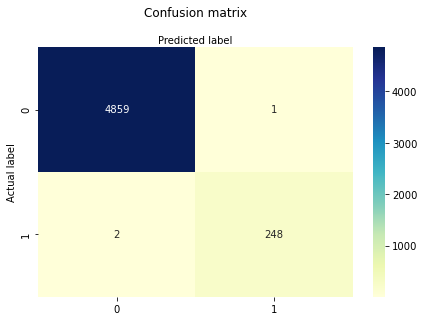

In [88]:
for i in range(max_iterations):
    epoch_wise_predicted = prediction[i]
    confusion = confusion_matrix(list(epoch_wise_predicted), list(expected))
    class_names=["Yes","No"] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sb.heatmap(pd.DataFrame(np.array(confusion)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print("\n")

### Calculating accuracy for each epoch

In [89]:
for i in range(max_iterations):
    predicted = prediction[i]
    print("Epoch " + str(i+1)+ " Accuracy = " + str(accuracy_score(predicted, expected)))

Epoch 1 Accuracy = 0.9992172211350293
Epoch 2 Accuracy = 0.999412915851272
Epoch 3 Accuracy = 0.9992172211350293
Epoch 4 Accuracy = 0.999412915851272
Epoch 5 Accuracy = 0.9992172211350293
Epoch 6 Accuracy = 0.9990215264187867
Epoch 7 Accuracy = 0.999412915851272
Epoch 8 Accuracy = 0.999412915851272
Epoch 9 Accuracy = 0.9992172211350293
Epoch 10 Accuracy = 0.999412915851272


## Using sklearn

### Importing libraries

In [90]:
from sklearn.linear_model import Perceptron

### Fitting the model and predicting the value

In [91]:
X = data[:, :-1]
y = data[:, -1]
model = Perceptron(random_state=1)
model.fit(X, np.array(y))
predicted = model.predict(X)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Printing the confusion matrix

In [92]:
results = confusion_matrix(y, predicted)
expected = []
for i in range(len(y)):
    expected.append(int(y[i]))
print(results)

[[4857    4]
 [ 249    0]]


### Printing the accuracy

In [93]:
print("Accuracy = " + str(accuracy_score(predicted, expected)))

Accuracy = 0.9504892367906067
